In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import inv

# Teoria

## Definicja problemu aproksymacji

Niech $\left(X, ∥ · ∥\right)$ będzie przestrzenią funkcyjną unormowaną oraz niech $f : \left[a, b\right] \rightarrow \mathcal{R}$ będzie funkcją należącą do przestrzeni $X$. Ponadto, niech $X_n$ będzie skończenie wymiarową podprzestrzenią przestrzeni $X$ oraz niech
$$\left\{\phi_0\left(x\right),\phi_1\left(x\right),\dots,\phi_n\left(x\right)\right\}$$
będzie wybraną bazą przestrzeni $X_n$.

Funkcję $\Phi\left(x;a\right) := \sum\limits_{k=1}^n a_k\phi_k\left(x\right)$ będziemy uważać za aproksymację funkcji $f \left(x\right)$, tzn. $f \left(x\right) \approx \phi\left(x;a\right),$
przy czym najlepszą aproksymację $\phi\left(x;a^*\right)$, gdzie $a^* = \left(a^*_1,\dots,a^*_n\right)$, określamy według reguły:

$$||f-\Phi\left(\cdot;a^*\right)||=\min\limits_a||f-\Phi\left(\cdot;a\right)||$$

## Metoda najmniejszych kwadratów

Metoda najmniejszych kwadratów polega na znalezieniu takiej funkcji, dla której suma kwadratów odległości między wartościami badanych punktów jest najmniejsza.
Zatem opiera się na na znalezieniu takiego $a$, że 
$$
\min\limits_a\sum\limits_{i=1}^n\left(f\left(x_i\right)-\Phi\left(x_i,a\right)\right)^2.
$$

# Zadanie 4.

Napisać program, który wyznacza $a, b$ takie, że $f\left(x\right) = a\,{\rm e}^x + b\,{\rm e}^{−x}$ aproksymuje
najlepiej w sensie metody najmniejszych kwadratów zbiór danych:

1. |$x_i$||$-1$|$-0.5$|$0$|$0.5$|$1$|
|---||---|---|---|---|---|
|$y_i$||$1.194$|$0.430$|$0.103$|$0.322$|$1.034$|


2. |$x_i$||$-0.00001$|$0$|$0.00001$|
|---||---|---|---|
|$y_i$||$0.3$|$0.6$|$0.7$|

Weźmy bazę $\left\{\phi_0={\rm e}^{x}, \phi_1={\rm e}^{-x}\right\}.$ Szukane parametry to $\left\{a,b\right\}.$

Z metody najmniejszych kwadratów, aby znaleźć odpowiednie $a$ i $b$, należy zminimalizować wartość wyrażenia
$$
F\left(a,b\right)=\sum\limits_{i=1}^m\left(y_i-a\,{\rm e}^{x}-b\,{\rm e}^{-x}\right)^2.
$$
\begin{aligned}
F\left(a,b\right)&=\sum\limits_{i=1}^m\left(y_i-a\,{\rm e}^{x}-b\,{\rm e}^{-x}\right)^2\\
&=\sum\limits_{i=1}^m{y_i}^2 + \sum\limits_{i=1}^m\left(a\,{\rm e}^{x}+b\,{\rm e}^{-x}\right)^2 - 2\sum\limits_{i=1}^my_i\left(a\,{\rm e}^{x}+b\,{\rm e}^{-x}\right)\\
&=\sum\limits_{i=1}^m{y_i}^2 + a^2\sum\limits_{i=1}^m{\rm e}^{2x_i}+b^2\sum\limits_{i=1}^m{\rm e}^{-2x_i}+2ab\sum\limits_{i=1}^m 1 - 2a\sum\limits_{i=1}^m y_i {\rm e}^{x} - 2b\sum\limits_{i=1}^m y_i {\rm e}^{-x}\\
&=\sum\limits_{i=1}^m{y_i}^2 + a^2\sum\limits_{i=1}^m{\rm e}^{2x_i}+b^2\sum\limits_{i=1}^m{\rm e}^{-2x_i}+2abm - 2a\sum\limits_{i=1}^m y_i {\rm e}^{x} - 2b\sum\limits_{i=1}^m y_i {\rm e}^{-x}
\end{aligned}

Wyznaczamy pochodne cząstkowe $F\left(a,b\right)$.

$\left\{
\begin{aligned}
\frac{\partial F}{\partial a}\left(a,b\right) &= 2a\sum\limits_{i=1}^m{\rm e}^{2x_i} + 2bm - 2\sum\limits_{i=1}^m y_i{\rm e}^{x_i}\\
\frac{\partial F}{\partial a}\left(a,b\right) &= 2b\sum\limits_{i=1}^m{\rm e}^{-2x_i} + 2am - 2\sum\limits_{i=1}^m y_i{\rm e}^{-x_i}
\end{aligned}\right.$

Przyrównujemy powyższe pochodne cząstkowe do zera:
$\left\{
\begin{aligned}
\frac{\partial F}{\partial a}\left(a,b\right) &= 2a\sum\limits_{i=1}^m{\rm e}^{2x_i} + 2bm - 2\sum\limits_{i=1}^m y_i{\rm e}^{x_i}=0\\
\frac{\partial F}{\partial a}\left(a,b\right) &= 2b\sum\limits_{i=1}^m{\rm e}^{-2x_i} + 2am - 2\sum\limits_{i=1}^m y_i{\rm e}^{-x_i}=0
\end{aligned}\right.$

$\left\{
\begin{aligned}
a\sum\limits_{i=1}^m{\rm e}^{2x_i} &+ bm &= \sum\limits_{i=1}^m y_i{\rm e}^{x_i}\\
am&+b\sum\limits_{i=1}^m{\rm e}^{-2x_i} &= \sum\limits_{i=1}^m y_i{\rm e}^{-x_i}
\end{aligned}\right.$

Co możemy zapisać w postaci macierzowej

$$
\begin{pmatrix}
\sum\limits_{i=1}^m{\rm e}^{2x_i} & m\\
m & \sum\limits_{i=1}^m{\rm e}^{-2x_i}
\end{pmatrix}
\,\,
\begin{pmatrix}
a\\
b
\end{pmatrix}
\quad =\quad
\begin{pmatrix}
\sum\limits_{i=1}^m y_i{\rm e}^{x_i}\\
\sum\limits_{i=1}^m y_i{\rm e}^{-x_i}
\end{pmatrix}.
$$

Zatem otrzymujemy rozwiązanie
$$
\begin{pmatrix}
a\\
b
\end{pmatrix}
\quad =\quad
\begin{pmatrix}
\sum\limits_{i=1}^m{\rm e}^{2x_i} & m\\
m & \sum\limits_{i=1}^m{\rm e}^{-2x_i}
\end{pmatrix}^{-1}
\,\,
\begin{pmatrix}
\sum\limits_{i=1}^m y_i{\rm e}^{x_i}\\
\sum\limits_{i=1}^m y_i{\rm e}^{-x_i}
\end{pmatrix}.
$$

In [2]:
def f1(x, y):
    m = len(x)
    first = [sum([np.exp(2*i) for i in x]), m]
    second = [m, sum([np.exp(-2*i) for i in x])]
    D = np.asmatrix([first,second])
    f = np.asmatrix([sum([np.exp(x[i])*y[i] for i in range(len(x))]),
                     sum([np.exp(-x[i])*y[i] for i in range(len(x))])]).T
    A = np.matmul(inv(D),f)
    a = A.item(0)
    b = A.item(1)
    return [a,b]

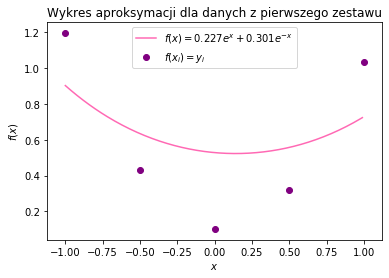

In [3]:
xi = [-1,-0.5,0,0.5,1]
yi = [1.194,0.430,0.103,0.322,1.034]
x = np.arange(-1,1,0.01)
wsp1 = f1(xi, yi)
y = wsp1[0]*np.exp(x)+ wsp1[1]*np.exp(-x)
plt.plot(x,y, color='hotpink', label='$f(x)=$'+str(round(wsp1[0],3))+'$e^x+$'+str(round(wsp1[1],3))+'$e^{-x}$')
plt.scatter(xi,yi, color='purple', label='$f(x_i)=y_i$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Wykres aproksymacji dla danych z pierwszego zestawu')
plt.show()

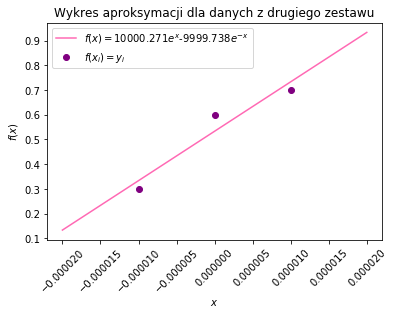

In [4]:
xi = [-0.00001,0,0.00001]
yi = [0.3,0.6,0.7]
x = np.arange(-0.00002,0.00002,0.0000001)
y = f1(xi, yi)
wsp2 = f1(xi, yi)
y = wsp2[0]*np.exp(x)+ wsp2[1]*np.exp(-x)
plt.plot(x,y, color='hotpink', label='$f(x)=$'+str(round(wsp2[0],3))+'$e^x$'+str(round(wsp2[1],3))+'$e^{-x}$')
plt.scatter(xi,yi, color='purple', label='$f(x_i)=y_i$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Wykres aproksymacji dla danych z drugiego zestawu')
plt.xticks(rotation=45)
plt.show()

II sposób (dla dowolnej bazy i punktów, $m\leq n$)


Możemy skorzystać ze wzoru $D^T\,D\,A=D^T\,f$, gdzie
1. $
D = 
\begin{pmatrix}
\phi_0\left(x_1\right) & \phi_1\left(x_1\right) & \cdots & \phi_m\left(x_1\right)\\
\phi_0\left(x_2\right) & \phi_1\left(x_2\right) & \cdots & \phi_m\left(x_2\right)\\
\vdots & \vdots & \cdots & \vdots\\
\phi_0\left(x_n\right) & \phi_1\left(x_n\right) & \cdots & \phi_m\left(x_n\right)
\end{pmatrix}
$   , gdzie $\left\{\phi_i: i=\left\{0,1,2,\dots,m\right\}\right\}$ to baza;


2. $
A =
\begin{pmatrix}
a_1\\
a_2\\
\vdots\\
a_m
\end{pmatrix}
$
   , to wektor szukanych parametrów;
   
   
3.  $
f =
\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix}
$, to wektor wartości funkcji w punktach $x_i$, dla $i=1,2,\dots x_n$.


Po przekształceniu równania otrzymujemy
$A=\left(D^T\,D\right)^{-1}D^T\,f$.

In [5]:
def f2(x, y, base):
    f = np.asmatrix(y).T
    D = np.zeros((len(x), len(base)))
    for i in range(len(base)):
        for j in range(len(x)):
            D[j,i] = base[i](x[j])
    Dt = D.T
    A = np.matmul(np.matmul(inv(np.matmul(Dt,D)),Dt),f)
    return A

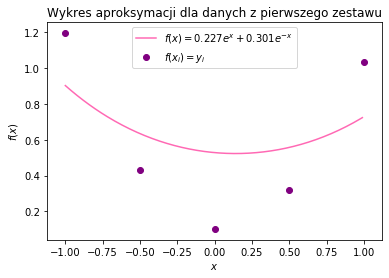

In [6]:
xi = [-1,-0.5,0,0.5,1]
yi = [1.194,0.430,0.103,0.322,1.034]
base = [lambda x: np.exp(x), lambda x: np.exp(-x)]
x = np.arange(-1,1,0.01)
wsp3 = f2(xi,yi,base)
y=0
for i in range(len(wsp3)):
    y += wsp3.item(i)*base[i](x)

plt.plot(x,y, color='hotpink', label='$f(x)=$'+str(round(wsp3.item(0),3))+'$e^x+$'+str(round(wsp3.item(1),3))+'$e^{-x}$')
plt.scatter(xi,yi, color='purple', label='$f(x_i)=y_i$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Wykres aproksymacji dla danych z pierwszego zestawu')
plt.show()

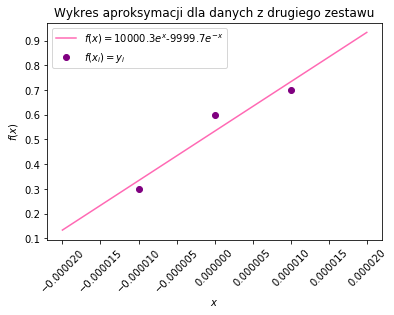

In [7]:
xi = [-0.00001,0,0.00001]
yi = [0.3,0.6,0.7]
base = [lambda x: np.exp(x), lambda x: np.exp(-x)]
x = np.arange(-0.00002,0.00002,0.0000001)
wsp4 = f2(xi,yi,base)
y=0
for i in range(len(wsp4)):
    y += wsp4.item(i)*base[i](x)

plt.plot(x,y, color='hotpink', label='$f(x)=$'+str(round(wsp4.item(0),1))+'$e^x$'+str(round(wsp4.item(1),1))+'$e^{-x}$')
plt.scatter(xi,yi, color='purple', label='$f(x_i)=y_i$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Wykres aproksymacji dla danych z drugiego zestawu')
plt.xticks(rotation=45)
plt.show()